In [1]:
import numpy as np
import pandas as pd
from FinancialInstrument import FinancialInstrument
from ETF import ETF
from Future import Future
from Portfolio import Portfolio
from datetime import date
from DateRanges import electionPeriodBoolsDF, e_year_ranges

<Axes: xlabel='Volatility'>

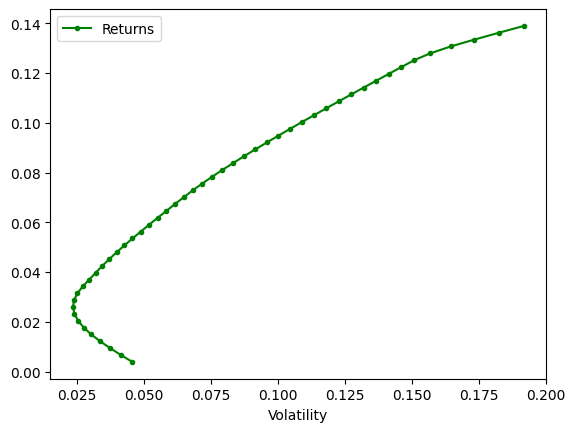

In [5]:
etfXLK = ETF("XLK")
etfXLU = ETF("XLU")
etfBND = ETF("BND")
etfGLD = ETF("GLD")
etfVTI = ETF("VTI")
futureFF1 = Future("FF1")
portfolio1 = Portfolio([etfXLK, etfXLU, etfBND, etfGLD, etfVTI, futureFF1])
portfolio1.plot_ef(n_points=50)